# Week 5: Visualization
This week we deal with visualizing result data both with the libraries matplotlib and seaborn
seaborn is great for quickly creating visually appealing plots with minimal code, while matplotlib offers more customization options and fine-grained control over every aspect of a plot.

In [16]:
# Import libraries and read dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("titanic/train.csv")

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


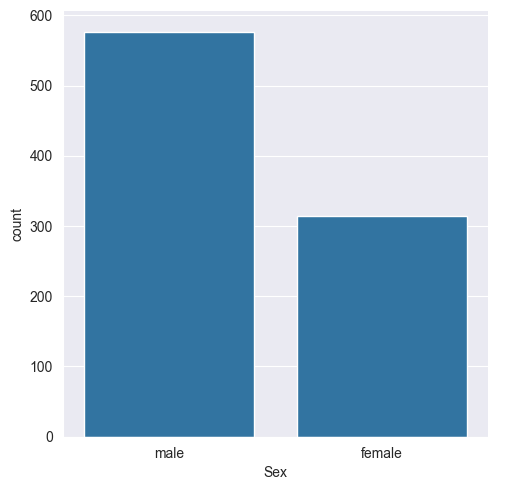

In [26]:
# Who were the passengers on the Titanic?
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Sex', data=data, kind='count')

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


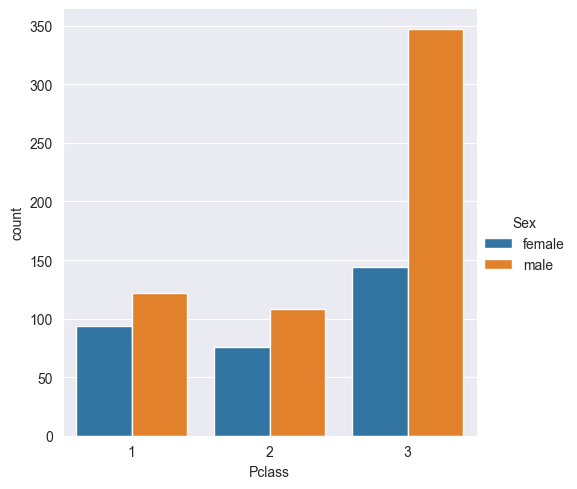

In [33]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
# hue' => is used to visualize the data of different categories in one plot.
sns.catplot(x='Pclass', data=data, hue='Sex', kind='count')

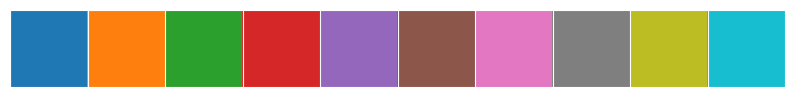

In [40]:
# seaborn.color_palette(palette=None, n_colors=None, desat=None) 
# Parameters: 
# palette:  Name of palette or None to return current palette. 
# n_colors:  Number of colors in the palette. 
# desat:  Proportion to desaturate each color. 

current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

In [53]:
# However, it might be useful to know the split between males, females, and children. How can we go about this?
# Create a new column 'Person' in which every person under 16 is child.
data['Person'] = data['Sex']
data.loc[data['Age'] < 16, 'Person'] = 'Child'
# Test

# Checking the distribution
print(f"Person categories : {data.Person.unique()}\n=================================")
print(f"Distribution of person : {data.Person.value_counts()}\n=================================")
print(f"Mean age : {data.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


In [52]:
# Test of previous cell
data.loc[data['Age'] <16, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,Child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,Child
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,Child
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,Child
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C,Child
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S,Child


C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


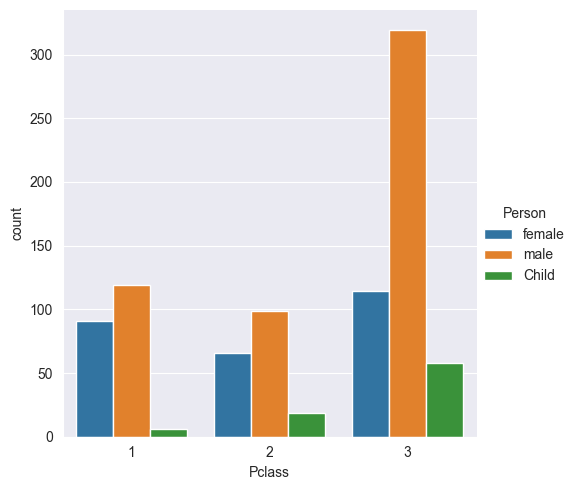

In [54]:
# Separation of the passengers between female, male, and child
sns.catplot(x='Pclass', data=data, hue='Person', kind='count')

Text(0, 0.5, 'Count')

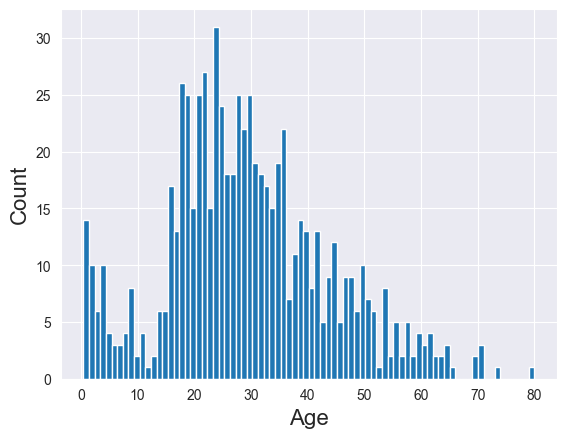

In [59]:
# Creating a distribution of the ages to get a more precise picture of who the passengers were?
# Visualizing the age distribution
# Matplotlib: We use the hist() function to create histogramsm, bins = number of intervalls
data['Age'].hist(bins=80)
plt.xlabel("Age", fontsize=16)  
plt.ylabel("Count", fontsize=16)

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


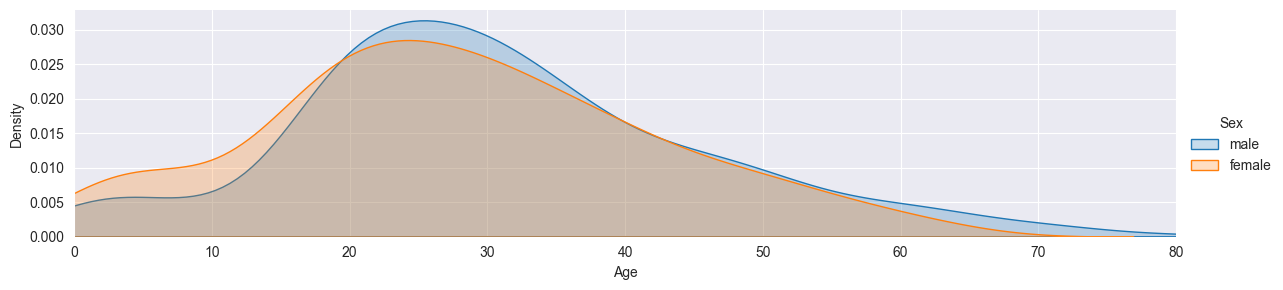

In [63]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram
fig = sns.FacetGrid(data, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


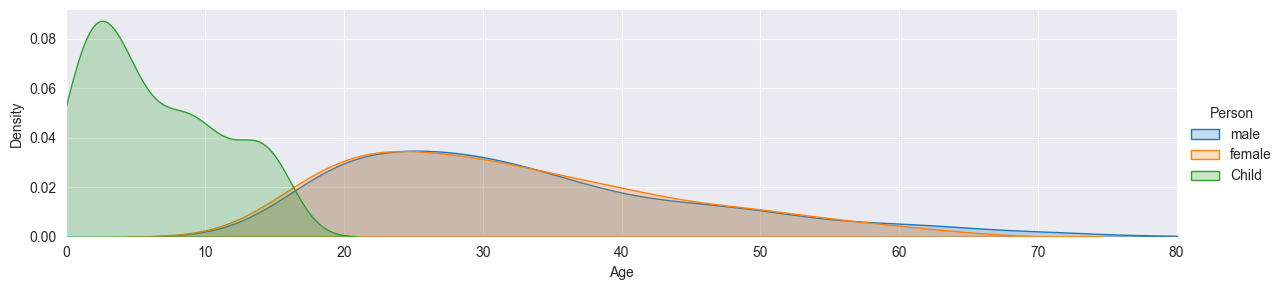

In [67]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(data, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


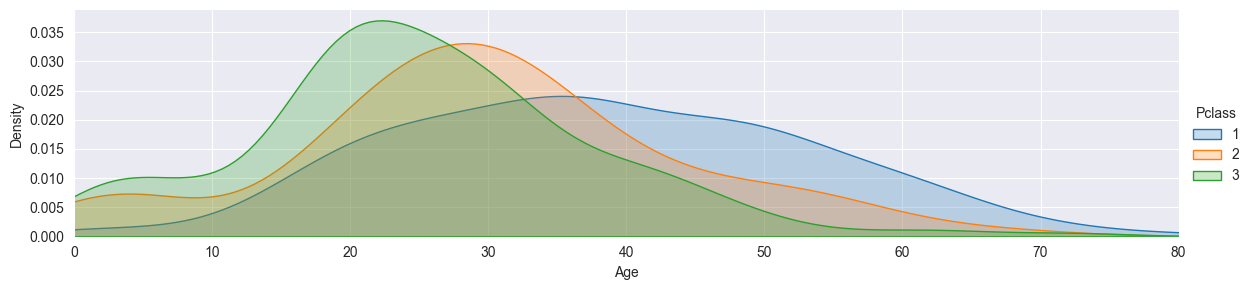

In [69]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(data, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


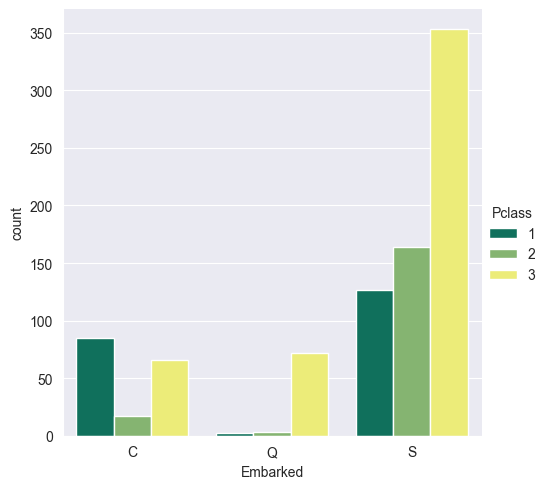

In [74]:
# Where did the passengers come from?
# Now we can make a quick factorplot to check out the results, note the order argument, used to deal with NaN values
sns.catplot(x='Embarked', data=data, hue='Pclass', kind='count', order=['C', 'Q', 'S'], palette='summer')


C:\Users\raine\AppData\Local\Temp\ipykernel_19720\2341778012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survivor', data=data, kind='count', palette=['red', 'green'])
C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


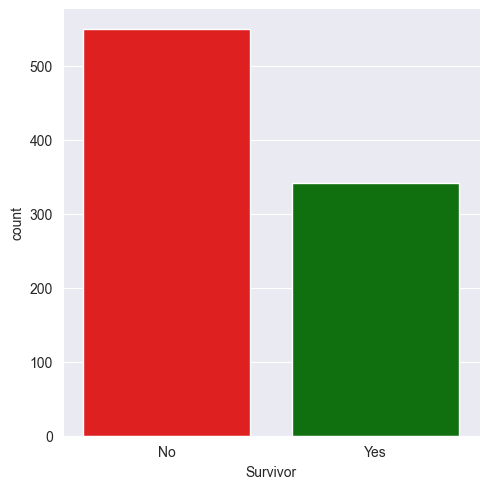

In [86]:
    # What factors helped someone survive the sinking?
# Let's start by creating a new column for legibility purposes through mapping
data['Survivor'] = data['Survived'].map({0:'No', 1:'Yes'})
# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor', data=data, kind='count', palette=['red', 'green'])

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


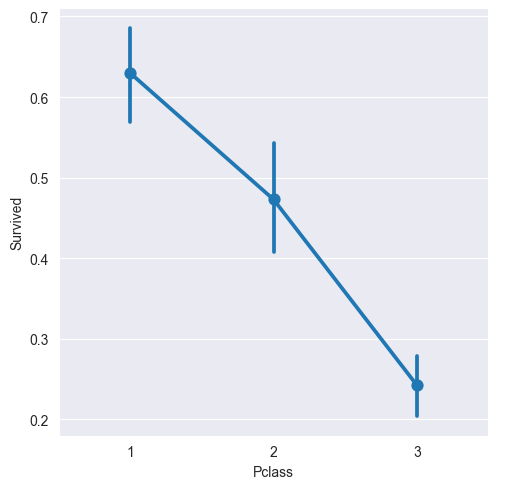

In [100]:
# Let's use a factor plot again, but now considering class
sns.catplot( x='Pclass', y="Survived", data=data,  kind='point')

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


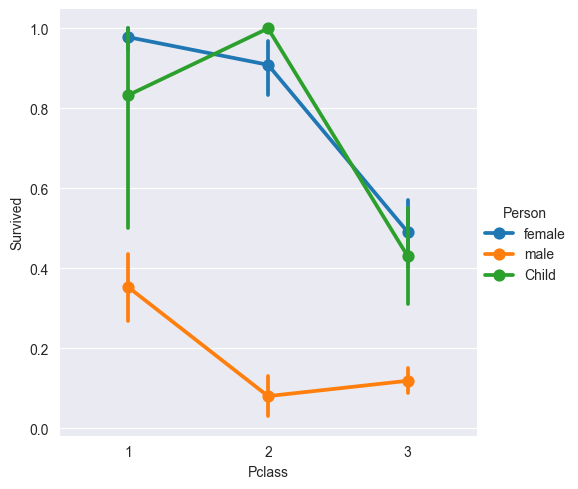

In [103]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass', y='Survived', data=data, hue='Person', kind='point')

C:\Users\raine\PycharmProjects\Quizify_Gemini\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


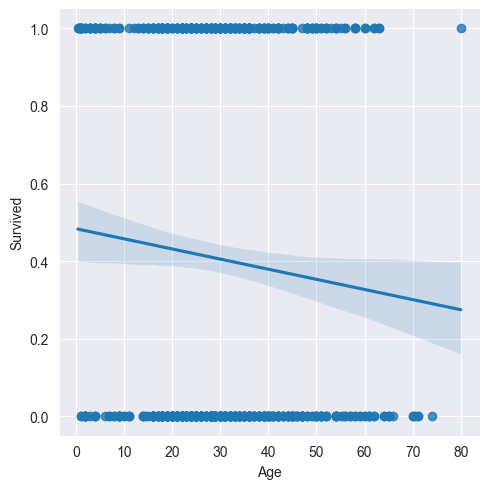

In [107]:
# But what about age? Did being younger or older have an effect on the survival rate?
# Let's use a linear plot on age versus survival
# The lineplot (lmplot) is one of the most basic plots. It shows a line on a 2-dimensional plane.
sns.lmplot(x='Age', y='Survived', data=data)